In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [7]:
jdf = pd.read_json("dim_customer.json")

jdf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy 1

In [8]:
# EASY 1

easy1_ans = df['customer_id'].nunique()

print("Answer for Easy 1 is " + str(easy1_ans) + ".")

Answer for Easy 1 is 5191.


In [9]:
# EASY 2

pd.Series(df['category'].unique())

0           Clothing
1              Shoes
2              Books
3          Cosmetics
4    Food & Beverage
5               Toys
6         Technology
7           Souvenir
dtype: object

In [10]:
# EASY 3 (JK)
# LOL THIS WAS SCRATCH
print("Credit Card: " + str(df['payment_method'].value_counts()['Credit Card']))
print("Debit Card: " + str(df['payment_method'].value_counts()['Debit Card']))
print("Cash: " + str(df['payment_method'].value_counts()['Cash']))
print(df['payment_method'].value_counts())

Credit Card: 34931
Debit Card: 20079
Cash: 44447
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [11]:
# EASY 3 (scratch ulet hehe)
df['payment_method'].value_counts()
#value_counts counts the number of it 

if df['payment_method'].value_counts()['Credit Card'] > (df['payment_method'].value_counts()['Debit Card'] and 
                                                         df['payment_method'].value_counts()['Cash']):
    print("Credit Card: " + str(df['payment_method'].value_counts()['Credit Card']))
    
elif df['payment_method'].value_counts()['Debit Card'] > (df['payment_method'].value_counts()['Credit Card'] and 
                                                         df['payment_method'].value_counts()['Cash']):
    print("Debit Card: " + str(df['payment_method'].value_counts()['Debit Card']))
    
else:
    print("Cash: " + str(df['payment_method'].value_counts()['Cash']))

Cash: 44447


# Easy 3 (real)

In [12]:
print(df['payment_method'].mode())
print(df['payment_method'].value_counts())

0    Cash
Name: payment_method, dtype: object
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [14]:
df['Total Sales'] = df['quantity'] * df['price']

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


# Medium 1

In [40]:
#  MEDIUM 1.1
df.groupby('category')['Total Sales'].sum().sort_values(ascending = False).head(3)

,price
category,
Clothing,31075684.64
Shoes,18135336.89
Technology,15772050.00


In [15]:
# Medium 1.2
df.groupby('category').sum().sort_values('Total Sales',ascending = False).head(3)
#df.groupby("Rep").sum().sort_values("Total Price", ascending=False).head()

C:\Users\Hannah Perez\AppData\Local\Temp\ipykernel_22660\3568454714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category').sum().sort_values('Total Sales',ascending = False).head(3)


,customer_id,quantity,price,Total Sales
category,,,,
Clothing,34578159,103558,31075684.64,1.139968e+08
Shoes,9901187,30217,18135336.89,6.655345e+07
Technology,5069499,15021,15772050.00,5.786235e+07


In [52]:
# scratch 1

jdf_age = jdf.loc[jdf['age'] >= 45,['age','id']]

jdf_age

,age,id
0,48.0,0
2,57.0,2
3,73.0,3
6,83.0,6
10,80.0,10
...,...,...
5181,84.0,8888
5182,48.0,8889
5184,46.0,9150
5185,69.0,9344


In [55]:
# scratch 2
jdf_merge = pd.concat([jdf, df['price']], axis=1)
jdf_merge

,age,first_name,gender,id,last_name,price
0,48.0,Nicholas,M,0.0,Flores,1500.40
1,NaN,Jeffery,M,1.0,Rowe,1800.51
2,57.0,Alexis,F,2.0,Benton,300.08
3,73.0,Amy,F,3.0,Johnson,3000.85
4,20.0,David,M,4.0,Moore,60.60
...,...,...,...,...,...,...
99452,NaN,NaN,NaN,NaN,NaN,58.65
99453,NaN,NaN,NaN,NaN,NaN,10.46
99454,NaN,NaN,NaN,NaN,NaN,10.46
99455,NaN,NaN,NaN,NaN,NaN,4200.00


## Medium 2

In [59]:
# MEDIUM 2
jdf_age_sales = jdf_merge.loc[jdf_merge['age']>= 45, ['price']].sum()
jdf_age_sales

price    1222991.04
dtype: float64

In [16]:
print('The total sales attributed to customers over the age of 45 is 82039768.15')

The total sales attributed to customers over the age of 45 is 82039768.15


## Medium 3

In [17]:
# How is the data distributed across different invoice dates? 
# Are there any seasonal trends or patterns? 
# (Use a graph for this.)
# MEDIUM 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'invoice_date' column to datetime if it's not already in that format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

sales_distribution = df.groupby(['year','month'])['Total Sales'].sum()
sales_distribution

C:\Users\Hannah Perez\AppData\Local\Temp\ipykernel_22660\770561142.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


year  month
2021  1         9311287.10
      2         8814790.84
      3        10059349.81
      4         9730141.58
      5         9767474.25
      6         9485372.57
      7        10142596.01
      8         9490554.67
      9         8913202.33
      10       10159800.73
      11        9060694.39
      12        9625306.31
2022  1         9917602.79
      2         8594168.17
      3         9862725.13
      4         9616818.11
      5         9902187.05
      6         9727219.72
      7         9662190.26
      8         9408352.51
      9         9603433.46
      10       10072915.55
      11        9154271.83
      12        9914929.50
2023  1         6526787.56
      2         6571108.67
      3          904121.90
      4         1013615.45
      5          938616.68
      6         1131464.73
      7          916750.45
      8          913654.79
      9          731473.04
      10         816291.56
      11         485230.74
      12         559294.01
Name: Total Sale

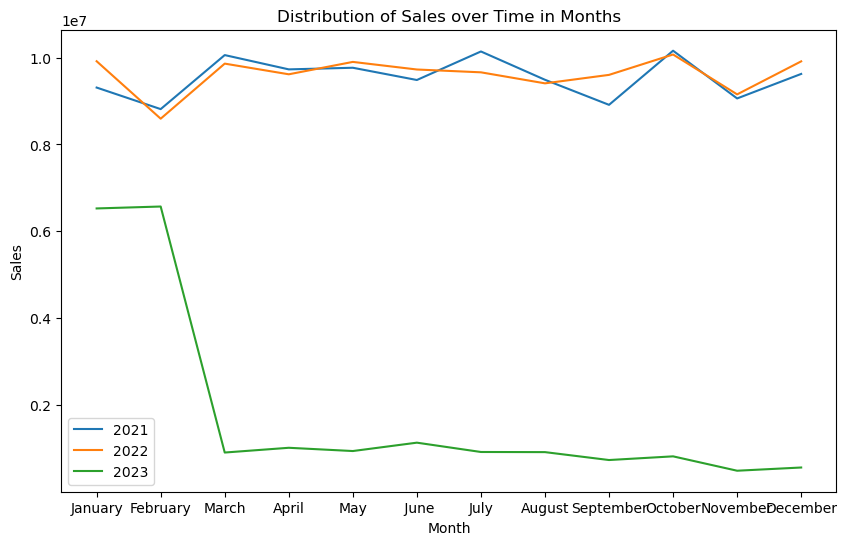

In [18]:
sales_distribution = sales_distribution.unstack(level=0)
sales_distribution.plot(kind="line", figsize=(10,6))
month_names = ['January', 'February', 'March', 'April', 'May',' June', 'July','August','September','October','November','December']
plt.title("Distribution of Sales over Time in Months")
plt.xlabel("Month")
plt.xticks(range(1,13), month_names)
plt.ylabel("Sales")
plt.legend(["2021", "2022", "2023"])
plt.show()

SEASONAL ANALYSIS OF MEDIUM #3
- Sales increase/surge in the months of March, May, July, October, and December
- Sales decrease in the months of February, April, August, and November
- Sales greatlt decrease on February and November
- July has the highest sales, followed by October
- The graph lacks data for sales trends in 2023

In [20]:
pivotjson = jdf.copy()
newpivotjson = pivotjson.rename(columns = {'id':'customer_id'})
newpivotjson

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [5]:
import pandas as pd
newdf = pd.read_csv('fct_invoice.csv')
newdf['invoice_date'] = pd.to_datetime(newdf['invoice_date'], format='%d/%m/%Y')
newdf['invoice_month'] = newdf['invoice_date'].dt.month
newdf['invoice_year'] = newdf['invoice_date'].dt.year                                                        

newdf.sort_values(['invoice_year','invoice_month'])


experidf = newdf.sort_values(['invoice_year','invoice_month']).copy()

grouped_data = experidf.groupby(['invoice_year', 'invoice_month']).agg({'quantity': 'sum'}).reset_index()
grouped_data.sort_values(['invoice_year', 'invoice_month'], inplace=True)

grouped_data

,invoice_year,invoice_month,quantity
0,2021,1,11483
1,2021,2,10179
2,2021,3,11383
3,2021,4,11270
4,2021,5,11620
5,2021,6,11352
6,2021,7,11986
7,2021,8,11205
8,2021,9,10901
9,2021,10,11711


In [24]:
# HARD

eme = df.merge(pivotjson, how = 'left', left_on = 'customer_id', right_on = 'id')
eme

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales,year,month,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022,5,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021,12,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021,9,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021,5,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021,10,NaN,Richard,M,1089,Rhodes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022,9,53.0,Michelle,F,2344,Stevens
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,2021,9,NaN,Lauren,F,172,Perkins
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,2021,3,36.0,Mark,M,425,Pham
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,2021,3,64.0,David,M,577,Williams


In [25]:
pivotdf = pd.merge(df, newpivotjson, on='customer_id')
pivotdf["age_range"] = pd.cut(pivotdf["age"], bins=range(10, 91, 10), right=False)
pivot_table = pd.pivot_table(pivotdf, values="Total Sales", index="age_range", columns="category", aggfunc="sum")
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
"[10, 20)",12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
"[20, 30)",79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
"[30, 40)",84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
"[40, 50)",87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
"[50, 60)",74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
"[60, 70)",80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
"[70, 80)",54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
"[80, 90)",26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
